This course is about the creation and analisys of clusters.
In the analisys of clusters, we can group together clients with similar behavior, or even discover what are the beahaviors of each cluster.
We will also see how to use the cluster's information to make decision on a business.

Remenbering the classification process:

To know credit card risk level of a certain client we can get a dataset with data about how clients have been using the credit card. And knowing the risk that they are today we can train a model on that dataset and then try to predict ther risk level of that new client. This technique of classification is a supervised learning process, given that we trained the model on data that we already know to wich class each input belongs.

When we start the process of creating clusters we don't have any labels. To deal with that we can use clustering with unsupervised learning. That way we can create (or discover) the labels for data's obtained clusters.

Whith clustering we can create categories to put the data in. When we already have the labels we use classification.

Data link: https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv

In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [2]:
# cleaning the data
# we can remove features that don't add value for the data analisys
# features that have a constant value, don't help in the clustering process
data.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0      201.802084        139.509787          0.000000  
1     4103.032597       1072.340217          0.222222  
2      622.066742        627.284787          0.000000  
3        0.000000               NaN          0.000000  
4      678.334763        244.791237          0.000000  
...           ...               ...               ...  
8945   325.594462         48.886365          0.500000  
8946   275.861322               NaN          0.000000  
8947    81.270775         82.418369          0.250000  
8948    52.549959         

In [3]:
# clean empty values
# for all the columns sum the null values
missing = data.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [4]:
# let's replace the null cells by the median of the values of the column
data.fillna(data.median(), inplace=True)

missing = data.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [5]:
# normalise the data
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(data.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [6]:
# run the clustering process
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = k_means.fit_predict(values)

# Cluster validation metrics

There are external metrics where we need the labels, and there are internal metrics that are independent of labels

**Validation criterias:**

* Compression: How near are the points from each other on the inside of a cluster. We want theese distances between points insede the cluster to be low, that is, more compact.
* Separation: This is about the distance between points from different clusters, or the distance between clusters. We want the separation between clusters to be hight.

So, inside a cluster we want the points to be as close as possible from each other and between clusters we want them to be as distant as possible from each other. That way we will have a good clustering schema.

## Silhouette coeficient mathematics

The output interval of s is: [-1, 1].

As more closer to 1 are values the better, as more closer to -1 worst is the coeficient.

s = (b-a)/max(a,b)

a: mean distance between a point and every other points inside the cluster.

b: mean distance betwen a point and all the points from the nearest cluster.

To calculate the distance between the points we use the euclidean distance, bellow we have the formula for the euclidean distance between the points A and B.

d(A,B) = sqrt( (x_A-x_B)ˆ2 + (y_A-y_B)ˆ2 )

a = sum(d(P_0, P_n))/n

P stands for points inside the same cluster

b = min(sum(d(PC1_0, PCn_n))/n)

PC stands for Point of Cluster 1 ... . Thats is, the minimum distance between a point from a cluster, from all the other clusters.

In [7]:
# Let's get the silhouette coeficient of our clusters with scikit-learn
from sklearn import metrics

# labels are the clusters
labels = k_means.labels_
labels

array([0, 4, 0, ..., 0, 0, 2], dtype=int32)

In [8]:
# values is our original data normalized, euclidean already is the defalut metric for calculating distances
silhouette = metrics.silhouette_score(values, labels)
# the silhouette coeficient is calculated for individual points, this result is the mean of the coeficient of all the points
silhouette
# our result is greatter than zero, so we can consider it a good value
# as closer to 1 the value of silhouette is, more space there ir between the clusters

0.36454479258047573

## Davies-bouldin indice

The indice is given by the following formula (i and j are the indexing of two different clusters):

DB = (1/k)sum(max(R_ij), 1, k), i!=j

For the DB value as closer to zero the better.

R_ij = (s_i + s_j)/d_ij

Basically R_ij is a measure of similarity between two clusters A and B. The minimum value of this indice is 0. If the clusters are close to each other R will be closer to zero, indicating a poor result, but, if the clusters are more distant from each other, R will produce a higher value, wich is good.

s: is the similarity inside a cluster (compression). It is the mean distance between each point of a cluster and the centroid of that cluster. The centroid of a cluster is the mean of all the point inside the cluster.
d: is the similarity between different clusters (separation, segregation). It's the distance between centroids of cluster's A and B.

In [9]:
# Let's calculate the Davies-Bouldin indice
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.0760464906093192

## Calinki-Harabasz indice

This indice is given by the following formula:

> s = tr(B_k)/tr(W_k) * (n_E-k)/(k-1)

**tr(B_k)/tr(W_k):** Reason between dispersion inside a cluster and dispersion between different clusters.

**tr():** Called trace, it's the sum of the elements of the leading diagonal.

**B_k:** Dispersion of elements between clusters.

> B_k = sum(n_q * (c_q - c_E)(c_q - c_E)ˆT, q=1, k)

**n_q:** Number of elements in a cluster.

**c_q:** Centroid of a cluster.

**c_E:** Centroid of the elements. To calculate c_E we just get all the points and calculate the average for each coordinate x and y.

**k:** Number of clusters.

**q:** A specific cluster.

**W_k:** Dispersion of elements within a cluster.

> W_k = sum(sum((x-C_q)(x-C_q)ˆT, x is element of C_q), q=1, k)

**sum((x-C_q)(x-C_q)ˆT, x is element of C_q):** The internal sum is a variance-covariance matrix estimation for each cluster.

Mounting this matrix takes the following steps:
1. Get a matrix with x and y values for each point of the cluster.
2. Get a vector with x and y coordinates of the centroid of the cluster.
3. Mount another matrix (let's call it A) with the differences between each coordinate point and the centroid coordinate points.
4. Create a transposed matrix from former matrix A (let's call this one B).
5. Mount the variance-covariance matrix by multiplying matrices A and B.

For the Calinki-Harabasz indice calculation only the variance needs to be calculated.

**(n_E-k)/(k-1):** Multiple the reason by values concerning the number of clusters and elements of a cluster.

**n_E:** Number of elements inside all of the clusters.

**k:** Number of clusters.


In [10]:
# Let's calculate the Caliski indice for our dataset
calinki = metrics.calinski_harabasz_score(values, labels)
calinki

3431.790347716922

## Analysing the metrics

How do we interpret the indices' values?

**Silhouette:** can have a value between -1 and 1, so if the value is greater than zero we can say that it is good, and as close to 1 the better.

**Davies-boulding:** In this case we want values to be closer to zero.

**Calinski-harabasz:** And in this case we want the value to be as hight as possible.

## Testing different values for K (number of clusters that will be created)

In [11]:
def clustering_algorithm(n_clusters, dataset):
    k_means = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = k_means.fit_predict(dataset)
    # silhouette
    s = metrics.silhouette_score(dataset, labels)
    # davies bauldin
    db = metrics.davies_bouldin_score(dataset, labels)
    # calinski
    c = metrics.calinski_harabasz_score(dataset, labels)
    return s, db, c

In [12]:
s1, db1, c1 = clustering_algorithm(3, values)

In [13]:
s1, db1, c1

(0.3272203126696238, 1.3096073640088426, 3526.440519908274)

In [14]:
s2, db2, c2 = clustering_algorithm(5, values)
s2, db2, c2
# in this case the silhuette value was better
# davies-bouldin was a little better
# and calinki was also a little worst

(0.3645055324417282, 1.0756856623533981, 3431.800717231779)

In [15]:
s3, db3, c3 = clustering_algorithm(10, values)
s3, db3, c3
# here sillhouette become the worst
# davies-bouldin got in secound
# and calinski got even worst

(0.3514205232297522, 1.1164237011642149, 3019.1944499679216)

## Comparing our model's result with a random data model's result

In [16]:
data.count()
# counting how many values do we have

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [17]:
# generating random data
import numpy as np

# this will generate data between 0 and 1
# the parameters are the data's shape, in this case: 8950 lines by 16 columns
random_data = np.random.rand(8950, 16)
random_data

array([[0.85489227, 0.7488552 , 0.95630449, ..., 0.2520373 , 0.08356241,
        0.86874154],
       [0.43639113, 0.67549385, 0.07130111, ..., 0.59655169, 0.13594522,
        0.86984994],
       [0.68127253, 0.58464897, 0.77826008, ..., 0.5429382 , 0.59925447,
        0.41882162],
       ...,
       [0.28791939, 0.42165002, 0.03603674, ..., 0.70733712, 0.12526588,
        0.22538522],
       [0.05159281, 0.22226456, 0.86298922, ..., 0.1522116 , 0.78002427,
        0.32853495],
       [0.53335021, 0.63839303, 0.31683341, ..., 0.11759512, 0.08772422,
        0.48793826]])

In [18]:
# now let's calculate the indice metrics for a clustering on this random data to see how it goes against our real clustering
s, db, c = clustering_algorithm(5, random_data)
print('Random:')
print(s, db, c)
print('Real clustering (k=5):')
print(s2, db2, c2)
# silhouette was much worst
# davies-bouldin also worst
# calinski also worst
# so, we can conclude that our real clustering is good

Random:
0.04003445562507185 3.495731442936242 304.5114958535116
Real clustering (k=5):
0.3645055324417282 1.0756856623533981 3431.800717231779


## Verifying cluster's stability

In [19]:
# let's devide our base set of data into three parts
set1, set2, set3 = np.array_split(values, 3)
set1, set2, set3

(array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
         1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
        [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
         3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
        [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
         7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
        ...,
        [2.12218500e-02, 6.06454246e-05, 3.34812598e-01, ...,
         2.82740852e-01, 7.88458519e-03, 3.33549557e-05],
        [3.85360748e-01, 7.17679981e-05, 6.70857036e-02, ...,
         8.66396789e-02, 1.03780305e-01, 0.00000000e+00],
        [2.78256980e-01, 2.83871204e-04, 2.18265424e-01, ...,
         6.72219652e-01, 1.16133152e-01, 3.90322867e-05]]),
 array([[2.45795698e-02, 1.61229464e-04, 5.93283094e-02, ...,
         1.44434182e-01, 2.63929895e-02, 0.00000000e+00],
        [2.32778680e-01, 1.27885152e-04, 6.23780291e-01, ...,
         1.65994229e-01, 5.22146604e-02, 2.13142346e-05],
        [3.49646979e-02, 

In [20]:
# now let's calculate the metrics (silhouette, davies-bouldin and calinski) for each set
s1, db1, c1 = clustering_algorithm(5, set1)
s1, db1, c1

(0.3689633507303375, 1.056111437621245, 1204.095547712886)

In [21]:
s2, db2, c2 = clustering_algorithm(5, set2)
s2, db2, c2

(0.35416642754504835, 1.138230644599316, 1194.951986504888)

In [22]:
s3, db3, c3 = clustering_algorithm(5, set3)
s3, db3, c3

(0.3669418399662425, 1.0994073210831397, 1167.508744368399)

We've seen that the values don't change very much even though we're using just a part of the dataset.
Tha's a signal that we have a stable and valid cluster.

# Visualising the clusters

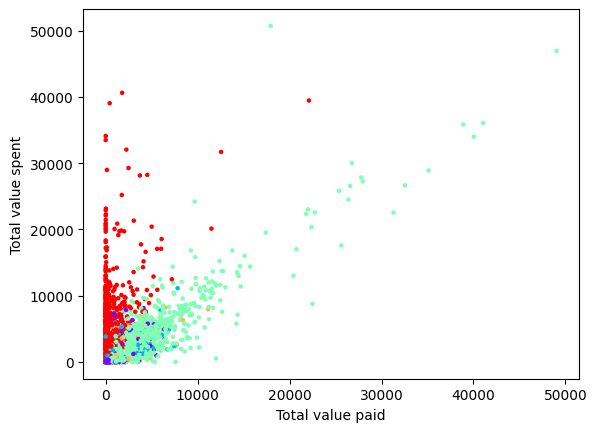

In [23]:
# We have sixteen features and tha's impossible to plot in a graph.
# So let's choose two atributes to plot.
# Let's plot purchases by payments
import matplotlib.pyplot as plt

plt.scatter(x=data['PURCHASES'], y=data['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Total value paid')
plt.ylabel('Total value spent')
plt.show()
# This image should show five clusters, but as we can see there are two that are prevalent.
# The green are clients that spend but don't pay and the orange one's are clients that paid accordingly to their spending
# Bus this information is not enough to completely understand the dataet

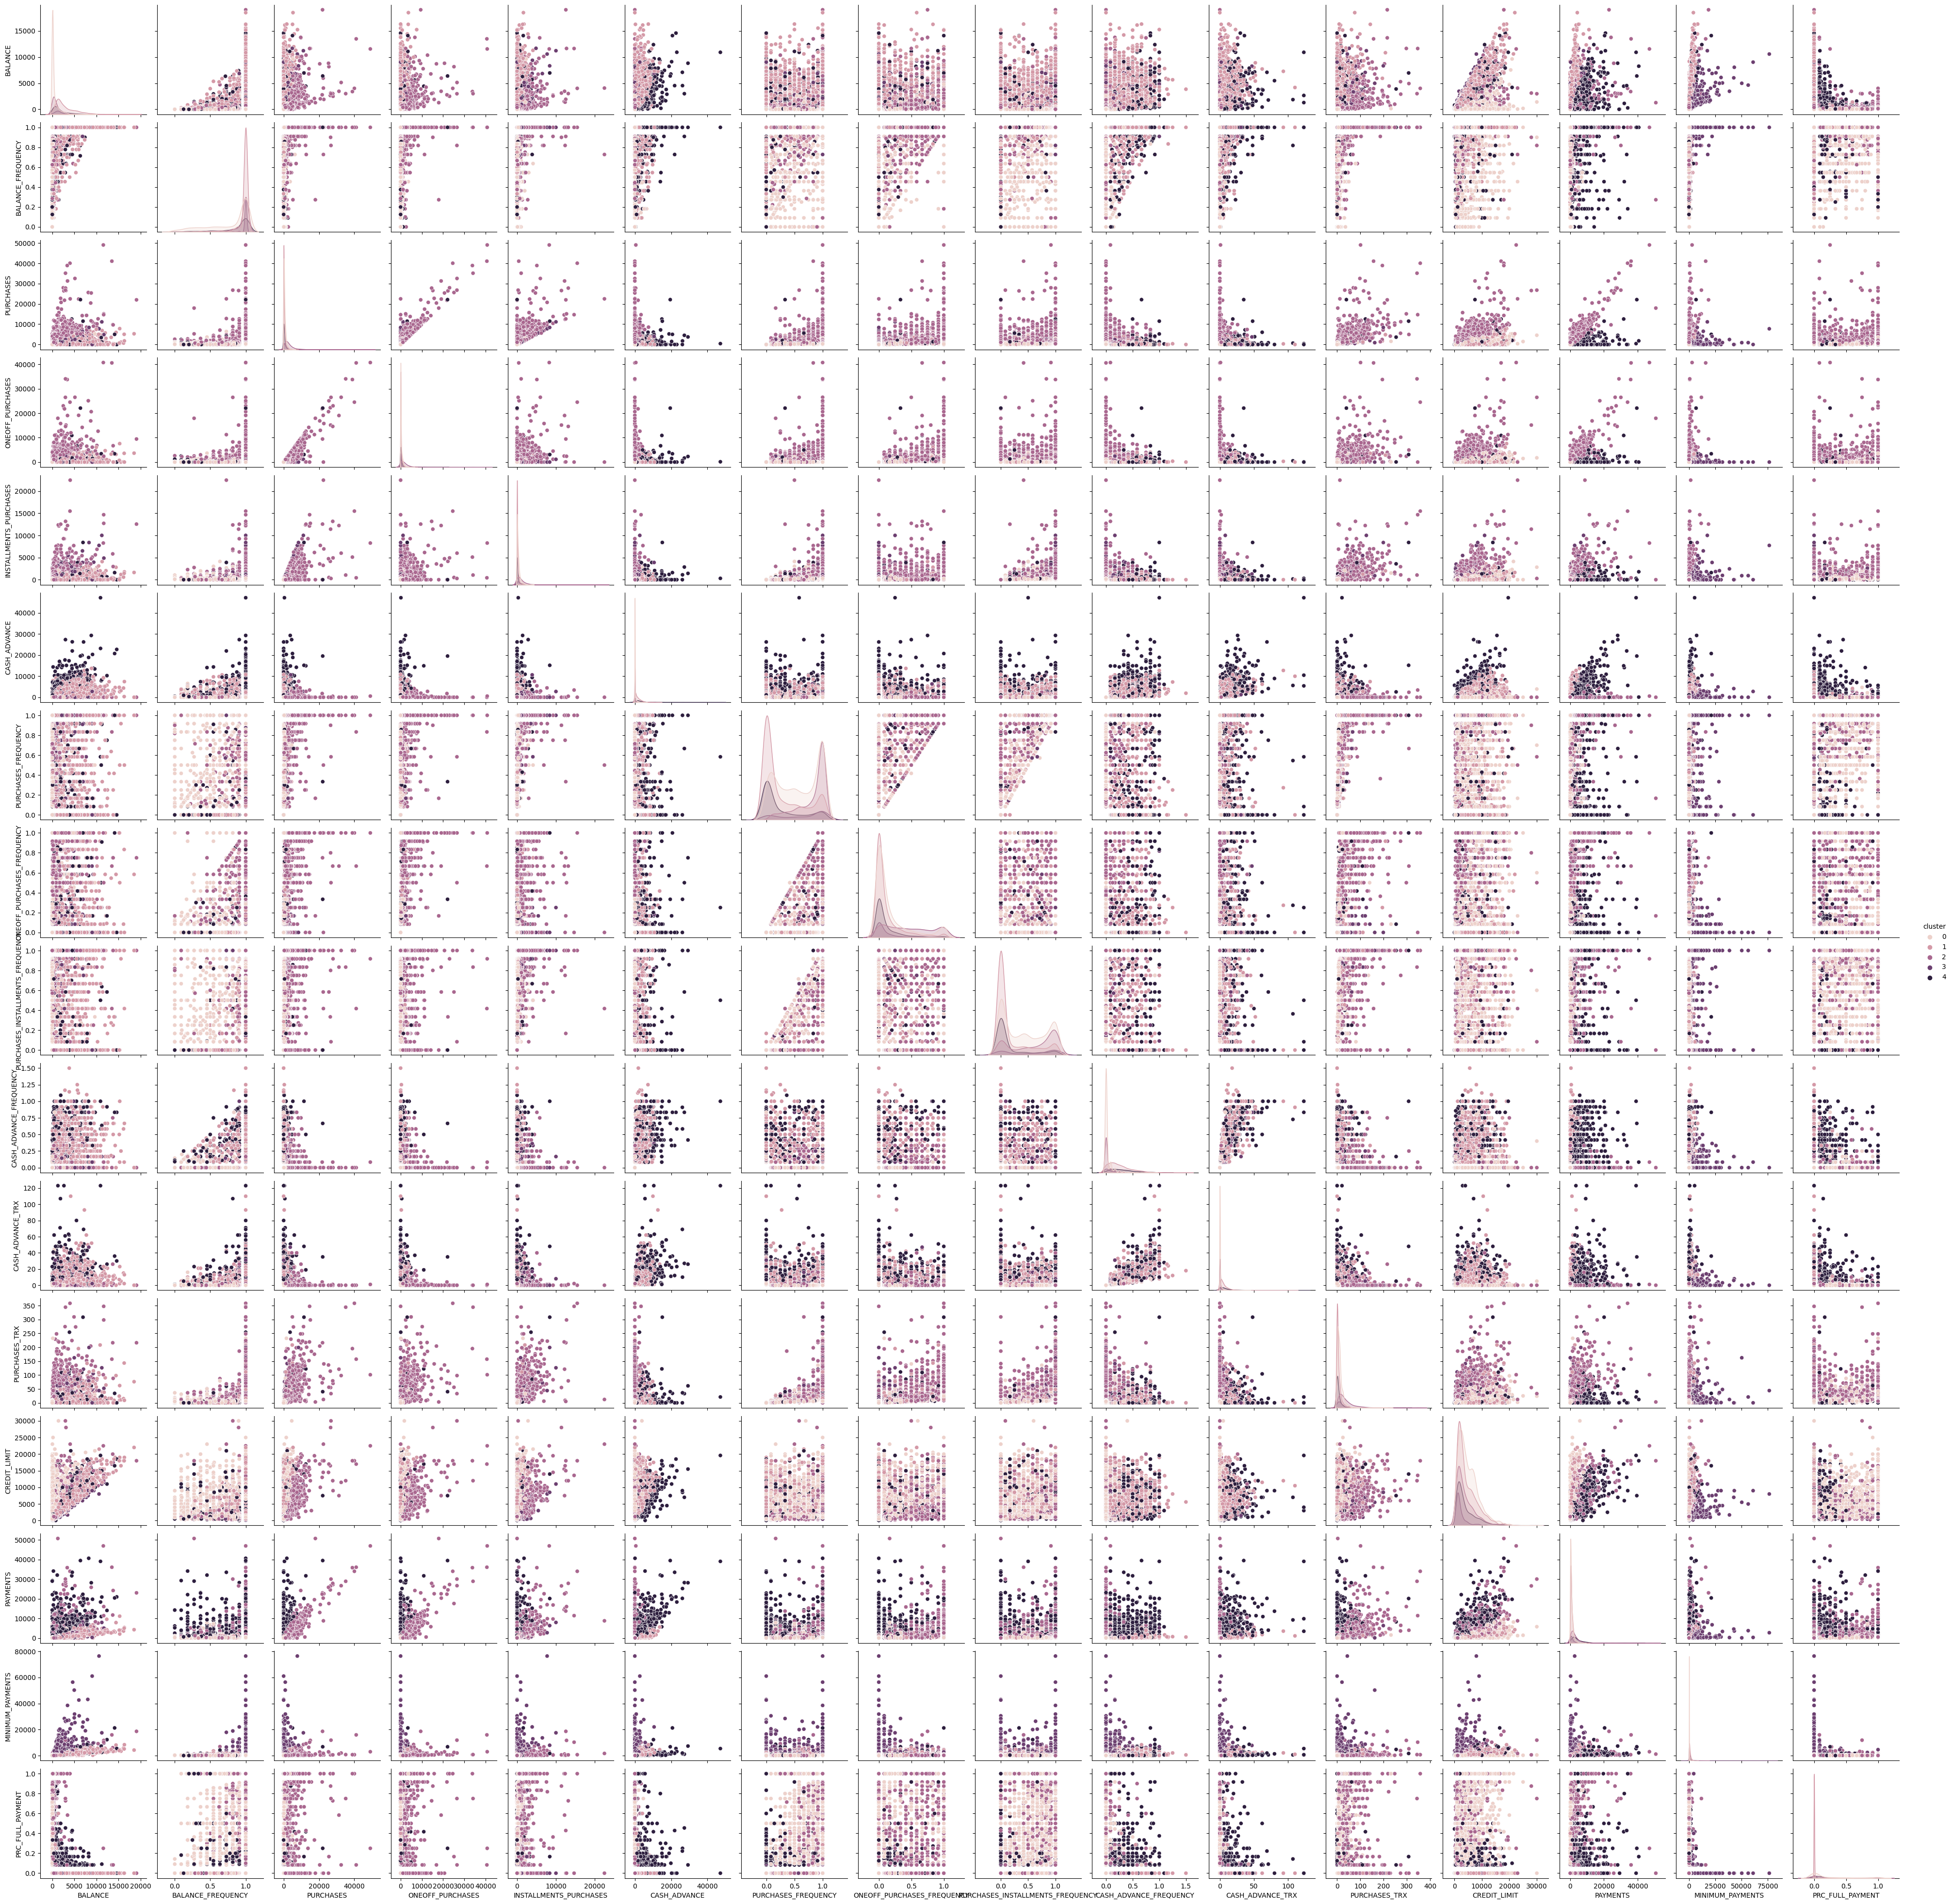

In [24]:
# let's try to see al the sixteen dimensions grouped in pairs of two features
import seaborn as sns
# adding the labels to the dataframe
data['cluster'] = labels
sns.pairplot(data, hue='cluster')
# this plot has not much utility as we can see, beacuse it's very dificult to interpret anything
# In this particular scenario visualisation is not a very good technique to be used

In [25]:
# Let's group our data acording to the new column 'cluster'
data.groupby('cluster').describe()
# for each cluster and for each feature we have a set of statistical information
# Still it is a little difficult to analyse the data

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3279.0   443.776995   846.525522   0.000000    23.340435   
1        2650.0  3036.946177  2478.922442   6.824905  1255.154881   
2        1536.0  1141.865757  1664.809840   0.000000   212.178230   
3         412.0  1987.146873  1852.215743  70.794108  1020.146724   
4        1073.0  1795.328292  1982.485775   0.000000   507.076999   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.902896   410.659944   9630.367575            3279.0  0.774514   
1        2173.994774  4223.858877  18495.558550            2650.0  0.963514   
2         554.332740  1370.056708  19043.138560            1536.0  0.928220   
3        1338.918346  2133.415063  11670.179850             412.0  0.989512   
4        1088.056301  2315.003636  14581.459140            1073.0  0.862260   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.766884   4483.503862           3279.0  0.246881   
1        ...      1330.541571   8345.641905           2650.0  0.001798   
2        ...       523.540210  18621.013310           1536.0  0.278331   
3        ...      7086.774783  76406.207520            412.0  0.019271   
4        ...       884.183626  21235.065300           1073.0  0.117430   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346775  0.0  0.0  0.000000  0.444444  1.0  
1        0.023256  0.0  0.0  0.000000  0.000000  0.6  
2        0.367137  0.0  0.0  0.083333  0.545455  1.0  
3        0.090795  0.0  0.0  0.000000  0.000000  1.0  
4        0.186772  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [26]:
# Let's get the centroids of the kmeans clustering object
centroids = k_means.cluster_centers_
centroids
# This is a set of data which is smaller than the previous formats, and that is good for analysis
# Here we have an array of arrays, the outer array contains the clusters inside of it (which is another array), the inner array contains the centroid value for each feture
# But how do we analyse this?
# Let's look at the variance for certain attribute along the five clusters
# We want attributes that have different values across clusters, that way we can see se particularities of each cluster
# Attributes that don't vary don't help in the analysis

array([[6.89799575e-02, 2.30763006e-04, 1.21587120e-01, 4.79794677e-02,
        7.37079733e-02, 2.40200669e-02, 1.73016299e-04, 3.36944404e-05,
        1.40456777e-04, 7.83464589e-06, 1.22859223e-04, 2.86637386e-03,
        9.43639117e-01, 1.53810130e-01, 5.68564456e-02, 7.61967577e-05],
       [5.03886149e-01, 2.72144714e-04, 6.15751915e-02, 3.61893482e-02,
        2.54075483e-02, 2.53219709e-01, 6.71312176e-05, 2.56644637e-05,
        4.48814714e-05, 5.75359114e-05, 1.15794119e-03, 1.32612254e-03,
        7.19404134e-01, 1.66061928e-01, 1.79050745e-01, 5.79660872e-07],
       [1.60105064e-01, 2.45216495e-04, 4.38561405e-01, 2.57200631e-01,
        1.81532508e-01, 2.58728121e-02, 2.04312848e-04, 8.90625500e-05,
        1.50516286e-04, 9.39341912e-06, 1.69901859e-04, 6.17654349e-03,
        6.03940941e-01, 4.02431241e-01, 8.53054178e-02, 7.19457109e-05],
       [3.33483624e-01, 2.68969713e-04, 1.59146477e-01, 3.61931219e-02,
        1.23336164e-01, 5.80731211e-02, 1.67333390e-04, 2.648

In [27]:
len(centroids[0])
# one centroid for each atribute

16

In [28]:
# Let's calculate the variance for each attribute and those with greatter variance will be the ones that we'l select
for i in range(len(centroids[0])):
    print(f"{data.columns.values[i]}: {centroids[:, i].var():.4f}")
# Calculating the variance of each centroid attribute along all the five clusters

BALANCE: 0.0224
BALANCE_FREQUENCY: 0.0000
PURCHASES: 0.0197
ONEOFF_PURCHASES: 0.0077
INSTALLMENTS_PURCHASES: 0.0036
CASH_ADVANCE: 0.0225
PURCHASES_FREQUENCY: 0.0000
ONEOFF_PURCHASES_FREQUENCY: 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY: 0.0000
CASH_ADVANCE_FREQUENCY: 0.0000
CASH_ADVANCE_TRX: 0.0000
PURCHASES_TRX: 0.0000
CREDIT_LIMIT: 0.0360
PAYMENTS: 0.0280
MINIMUM_PAYMENTS: 0.0541
PRC_FULL_PAYMENT: 0.0000


Let's anotate the features that have greater variance:

BALANCE: 0.0224

PURCHASES: 0.0197

CASH_ADVANCE: 0.0225

CREDIT_LIMIT: 0.0361

PAYMENTS: 0.0279

MINIMUM_PAYMENTS: 0.0546

In [29]:
data.groupby('cluster')['BALANCE'].describe()

count         mean          std        min          25%  \
cluster                                                             
0        3279.0   443.776995   846.525522   0.000000    23.340435   
1        2650.0  3036.946177  2478.922442   6.824905  1255.154881   
2        1536.0  1141.865757  1664.809840   0.000000   212.178230   
3         412.0  1987.146873  1852.215743  70.794108  1020.146724   
4        1073.0  1795.328292  1982.485775   0.000000   507.076999   

                 50%          75%           max  
cluster                                          
0          82.902896   410.659944   9630.367575  
1        2173.994774  4223.858877  18495.558550  
2         554.332740  1370.056708  19043.138560  
3        1338.918346  2133.415063  11670.179850  
4        1088.056301  2315.003636  14581.459140

In [30]:
description = data.groupby('cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']]
# How many elements per cluster
n_clients = description.size()
# Let's get the mean of each feature for each column
description = description.mean()
description['PRC_FULL_PAYMENT'] = description['PRC_FULL_PAYMENT']*100
description

BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.776995   629.282729    140.652097   5130.892579   814.340168   
1        3036.946177   385.299102   1637.380994   4495.584906   968.775192   
2        1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
3        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
4        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   

         PRC_FULL_PAYMENT  
cluster                    
0               24.688093  
1                0.179828  
2               27.833075  
3                1.927141  
4               11.742986

In [31]:
# Let's add n_clients to our description dataframe
description['n_clients'] = n_clients
# Let's sort the dataframe by number of clients, so when we run the notebook again the order of the clusters don't change.
description.sort_values(by=['n_clients'], inplace=True)
description

BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
3        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
4        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
2        1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
1        3036.946177   385.299102   1637.380994   4495.584906   968.775192   
0         443.776995   629.282729    140.652097   5130.892579   814.340168   

         PRC_FULL_PAYMENT  n_clients  
cluster                               
3                1.927141        412  
4               11.742986       1073  
2               27.833075       1536  
1                0.179828       2650  
0               24.688093       3279

Let's analyse the clusters

To make the most relevant interpretations we generally begin looking at the extreme values (minimum and maximum).

Let's make some conclusions about each cluster:
* C0: Smaller cash amount in the account. Smaller cash advance. Greater credit limit. Smaller payments value. Greater amount of people. Good payers. Summary: Low-spending customers, don't use the credit card much but have the greatest credit limit and pay well.
* C1: Good credit limit. Good amount of people. Low payment values. Smaller value on purchases. Summary: low spending clients and are not good payers.
* C2: Much greater value on purchases. Medium low amount of people. Best payers. Summary: clients that spend a lot with purchases on credit and are very good payers.
* C3: Average cash amount in the account. Lowest amount of people. Lowest credit limit. Bad payers. Summary: customers with low credit limit and are bad payers.
* C4: Low value on purchases. Greater cash advance value. Greater payments value. Medium low amount of people. Summary: customers that like to withdrawal and they are the ones who make the greatest payment values but are average payers.

Note: We can say that the above descriptions are the labels that we created for the data of our dataset.

Warning: Aparently on every run of the notebook the data can go to a different cluster, so the analisys above may not match the data on the description table.

How to use these clusters? We could apply some business strategy over certain clusters. For example, we could encourage clients of cluster zero to spend more, given that they have a great limit value, they are good payers and are int great volume of people but they don't spend much. We could also use the obtained clusters to apply A/B testing.

In [32]:
# Let's analyse another feature to better interpret the clusters. We will analise the percent of full payments.
# I added this column to the description table above, so it is easy to analyse
desc_full_payment = data.groupby('cluster')['PRC_FULL_PAYMENT'].describe()
desc_full_payment

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        3279.0  0.246881  0.346775  0.0  0.0  0.000000  0.444444  1.0
1        2650.0  0.001798  0.023256  0.0  0.0  0.000000  0.000000  0.6
2        1536.0  0.278331  0.367137  0.0  0.0  0.083333  0.545455  1.0
3         412.0  0.019271  0.090795  0.0  0.0  0.000000  0.000000  1.0
4        1073.0  0.117430  0.186772  0.0  0.0  0.083333  0.142857  1.0